In [5]:
!pip install -U fortran-magic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00


In [6]:
%matplotlib inline
%reload_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [7]:
assert ran_the_first_cell, "Oh noes!"

In [8]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [9]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [10]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [11]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [12]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [13]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [14]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [15]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [16]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [17]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [18]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [19]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [20]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [23]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [24]:
c = [[1, 2, 3],
     [3, 4, 5]]

d = [[6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20]]

In [25]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [26]:
%%time

matmul(a, b)

CPU times: user 67 µs, sys: 0 ns, total: 67 µs
Wall time: 72.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [27]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass retbleed
bogomips	: 4499.99
TLB s

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [28]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [29]:
%%time

matmul(a, b)

CPU times: user 63 µs, sys: 8 µs, total: 71 µs
Wall time: 75.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [30]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    if(len(a[0]) == len(b)):
       
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out

    else:
      print("Las condiciones de las matrices no son aptas para multiplicarse.")

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [31]:
%%time
matmul(a, b)

Las condiciones de las matrices no son aptas para multiplicarse.
CPU times: user 763 µs, sys: 0 ns, total: 763 µs
Wall time: 768 µs


In [32]:
%%time
matmul(c, d)

Las condiciones de las matrices no son aptas para multiplicarse.
CPU times: user 912 µs, sys: 0 ns, total: 912 µs
Wall time: 907 µs


**My own example 5 - Defining  A and B that are compatible for multiplication**

In [33]:
a = [[41, 21, 53],
     [32, 6, 52],
     [15, 6, 10],
     [10, 100, 1]]

b = [[7, 69, 23, 15],
     [23, 31, 4, 1],
     [0, 8, 7, 7]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [34]:
matmul(a, b)

[[770, 3904, 1398, 1007],
 [362, 2810, 1124, 850],
 [243, 1301, 439, 301],
 [2370, 3798, 637, 257]]

In [35]:
import random

In [36]:
random.normalvariate(0,1)

0.6877124127645323

In [37]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5572081543479439, 0.4833157421195503, 0.03772975893802166],
 [0.7469091928937126, 0.1717328379384926, 0.8195447507987439]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [38]:
import time
m=0

for i in range(0,10):
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)  
 
  s=time.time()  
  x = matmul(randa, randb)
  e=time.time()-s
  m=m+e
m=m/10

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [40]:
time_data_frame=pd.DataFrame([m],index=['Python'],columns=['Average time'])
time_data_frame

,Average time
Python,7.544561


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [63]:
import time
mz=0
for i in range(0,10):
  
  randma = np.array(random_matrix(600, 100))
  randmb = np.array(random_matrix(100, 600) ) 
  s=time.time()  
  x=randma@randmb
  e=time.time()-s
  mz=mz+e
mz=mz/10
time_data_frame=pd.DataFrame([m,mz],index=['Python = ','NumPy = '],columns=['Average time'])
time_data_frame

,Average time
Python =,7.544561
NumPy =,0.008140


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.99 s, sys: 4 ms, total: 5.99 s
Wall time: 5.99 s


In [41]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [42]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [43]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [44]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 56.9 ms, sys: 0 ns, total: 56.9 ms
Wall time: 65.1 ms


333328333350000.0

In [45]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 118 µs, sys: 1 µs, total: 119 µs
Wall time: 123 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [46]:
A=[[5,2],
   [3,6]]
B= [[3,9],
    [4,5]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [47]:
%%fortran

subroutine  matmul(A,B,N,L,M,Res)  
  implicit none
  integer,intent(in) :: N,L,M   
  double precision, intent(in) :: A(2,2)
  double precision, intent(in) :: B(2,2)
  double precision, intent(out) :: Res(N,M)
  integer I,J,K
  do I=1,N  
    do J=1,M
      Res(I,J)=0    
      do K=1,L
       Res(I,J) = Res(I,J) + A(I,K)*B(K,J)
        
      end do
    end do
  end do   
end 

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [48]:
N= len(A)
M= len(B[0])
L=len(A[0])
matmul(A,B,N,L,M)

array([[23., 55.],
       [33., 57.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [49]:
%%fortran

subroutine  matmul(A,B,N,L,M,Res)  
  implicit none
  integer,intent(in) :: N,L,M   
  double precision, intent(in) :: A(600,100)
  double precision, intent(in) :: B(100,600)
  double precision, intent(out) :: Res(N,M)
  integer I,J,K
  do I=1,N  
    do J=1,M
      Res(I,J)=0    
      do K=1,L
       Res(I,J) = Res(I,J) + A(I,K)*B(K,J)
      end do
    end do
  end do   
end 

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [50]:
randMa = random_matrix(600,100)
randMb = random_matrix(100,600)
N= len(randMa)
M= len(randMb[0])
L=len(randMa[0])
matmul(randMa,randMb,N,L,M)

array([[26.18181173, 24.1083744 , 27.31279181, ..., 27.80506696,
        23.76081043, 27.40966662],
       [24.71096601, 23.75412979, 24.80848658, ..., 24.41325949,
        22.23312085, 25.00981959],
       [28.01845224, 27.06065264, 30.02078054, ..., 27.78325003,
        26.75376653, 30.66647699],
       ...,
       [25.63346691, 24.85235652, 27.1975755 , ..., 26.08745097,
        23.30276987, 27.26259737],
       [20.92107731, 19.99585067, 21.39860502, ..., 21.50199086,
        19.68116975, 23.03600512],
       [27.91022993, 27.39245911, 30.31984416, ..., 28.87355356,
        24.50074153, 30.72617337]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [64]:
import time
mf=0
for i in range(0,10):
  randMa = random_matrix(600,100)
  randMb = random_matrix(100,600)
  N= len(randMa)
  M= len(randMb[0])
  L=len(randMa[0])
  s=time.time()  
  matmul(randMa,randMb,N,L,M)
  e=time.time()-s
  mf=mf+e
mf=mf/10
time_data_frame=pd.DataFrame([m,mz,mf],index=['Python =','NumPy =','Fortran Magic ='],columns=['Average time'])
time_data_frame

,Average time
Python =,7.544561
NumPy =,0.008140
Fortran Magic =,0.033396


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [54]:
%%fortran

subroutine  matmul10x(A,B,N,L,M,Res)  
  implicit none
  integer,intent(in) :: N,L,M   
  double precision, intent(in) :: A(600,100)
  double precision, intent(in) :: B(100,600)
  double precision, intent(out) :: Res(N,M)
  integer I,J,K,P
  do P=0,10
   do I=1,N  
     do J=1,M
       Res(I,J)=0    
        do K=1,L
        Res(I,J) = Res(I,J) + A(I,K)*B(K,J)
        end do
      end do
    end do
  end do   
end 

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [55]:
randma = random_matrix(600,100)
randmb = random_matrix(100,600)\

N= len(randma)
M= len(randmb[0])
L=len(randma[0])

s=time.time() 
matmul10x(randma,randmb,N,L,M)
e=time.time()-s
e=e/10

**My own example 18 - Adding Fortran average execution time to the data frame**

In [65]:
time_data_frame=pd.DataFrame([m,mz,mf,e],index=['Python','NumPy','Fortran Magic','Fortran'],columns=['Average Time'])
time_data_frame

,Average Time
Python,7.544561
NumPy,0.008140
Fortran Magic,0.033396
Fortran,0.033183


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [67]:
%%writefile multiplying_m.c
#include "iostream"
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
#include <ctime> 

using namespace std;
int main()
{

 srand(time(0));

 int matA[600][100], i ,j;
 
 for ( i = 0; i < 600; ++i){ // limits for matrix A
   for ( j = 0;  j < 100; ++j){
    matA[i][j] = rand()%200;
   }
     
  }
 

int matB[100][600]; // limits for matrix B
 for ( i = 0; i < 100; i++){
      for( j = 0;  j < 600; j++){
        matB[i][j] = rand()%200;
        }
  }

float md,t_0,t_1;
int t, mult[600][600];
for (t = 0; t<10; t++){
 t_0=clock();

 for (int i = 0; i <600 ; i++)
 {
   for (int j = 0; j < 600; j++){
       
     for (int k = 0; k < 100; k++){
         
      mult[i][j] +=  matA[i][k] * matB[k][j]; //multiplying  both matA & matB
      
     }
       
   }

 }
    t_1 = clock(); //defining clocks per sec variable
    double time = (double(t_1-t_0)/CLOCKS_PER_SEC); 
    
    md=md+time;
}
md=md/10;
cout << md;


   return 0; 
  }

Overwriting multiplying_m.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [73]:
!g++ multiplying_m.c -o multiplying_m && ./a.out

0.142703

**My own example 21 - Adding c average execution time to the data frame**

In [74]:
time_data_frame=pd.DataFrame([m,mz,mf,e,0.142703],index=['Python','NumPy','Fortran Magic','Fortran','C'],columns=['Average time'])
time_data_frame

,Average time
Python,7.544561
NumPy,0.008140
Fortran Magic,0.033396
Fortran,0.033183
C,0.159717


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [79]:
%%writefile multiplying_m.cpp
#include "iostream"
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
#include <ctime> 

using namespace std;
int main()
{

 srand(time(0));

 int matA[600][100], i ,j;
 
 for ( i = 0; i < 600; ++i){ // limits for matrix A
   for ( j = 0;  j < 100; ++j){
    matA[i][j] = rand()%200;
   }    
  }

int matB[100][600]; // limits for matrix B
 for ( i = 0; i < 100; i++){
      for( j = 0;  j < 600; j++){
        matB[i][j] = rand()%200;
        }
  }

float md,t_0,t_1;
int t, mult[600][600];
for (t = 0; t<10; t++){
 t_0=clock();
 for (int i = 0; i <600 ; i++)
 {
   for (int j = 0; j < 600; j++){
     for (int k = 0; k < 100; k++){
      mult[i][j] +=  matA[i][k] * matB[k][j]; //multiplying  both matA & matB
     }
   }
 }
    t_1 = clock(); //defining clocks per sec variable
    double time = (double(t_1-t_0)/CLOCKS_PER_SEC); 
    md=md+time;
}
md=md/10;
cout << md;
   return 0; 
  }

Writing multiplying_m.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [80]:
!g++ multiplying_m.cpp -o multiplying_m && ./a.out

0.142029

**My own example 24 - Adding C++ average execution time to the data frame**

In [81]:
time_data_frame=pd.DataFrame([m,mz,mf,e,0.142703,0.142029],index=['Python','NumPy','Fortran Magic','Fortran','C','C++'],columns=['Average time'])
time_data_frame

,Average time
Python,7.544561
NumPy,0.008140
Fortran Magic,0.033396
Fortran,0.033183
C,0.142703
C++,0.142029


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [83]:
%%writefile Main.java
import java.util.concurrent.*;
class Main{
  public static void main(String[] args){
    long media = 0;
    double answer = 0;
    int counter = 0;
    //Here we define the matrix for A and B, 600x100 and 100x600 respectively
    int a [][]= new int[600][100];
    int b [][] =new int[100][600];
    for(int x=0; x<a.length;x++){
      for(int y=0;y<a[x].length;y++){
        a[x][y] = (int) (Math.random()*999+1);
          }
        }
    for(int x=0; x<b.length;x++){
      for(int y=0;y<b[x].length;y++){
        b[x][y] = (int) (Math.random()*999+1);
          }
        } 
    int[][] c = new int[a.length][b[0].length];
    for(counter=0;counter<10;counter++){
      long t1 =System.currentTimeMillis();
      for(int i=0;i<c.length;i++){
          for(int j=0;j<c[0].length;j++){
            for(int k=0;k<b.length;k++){
              c[i][j]+=a[i][k]*b[k][j]; 
            }
          }
        }
      long t2=System.currentTimeMillis();
      long finalT = t2 - t1;
      media += finalT;      
      
    } 
    answer= (media/10);
    answer= answer*(0.001);
    System.out.println(answer); 
  }
}

Overwriting Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [84]:
!javac Main.java

In [85]:
!java Main

0.049


**My own example 27 - Adding Java average execution time to the data frame**

In [86]:
time_data_frame=pd.DataFrame([m,mz,mf,e,0.142703,0.142029,0.049],index=['Python','NumPy','Fortran Magic','Fortran','C','C++','Java'],columns=['Average time'])
time_data_frame

,Average time
Python,7.544561
NumPy,0.008140
Fortran Magic,0.033396
Fortran,0.033183
C,0.142703
C++,0.142029
Java,0.049000


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [93]:
%%writefile tmp.js

var MatA = [] //defining first matrix
for (var i = 0; i < 600; i++) {
  a=Array.from({length: 100}, () => (Math.random() * 80));
  MatA.push(a)
}
var MatB = [] //defining second matrix
for (var i = 0; i < 100; i++) {
  x=Array.from({length: 600}, () => (Math.random() * 80));
  MatB.push(x)
}

time=0
for(i=0; i<10;i++){
    var start = new Date().getTime();
    var matm= new Array(MatA.length);
      for (x=0; x<matm.length;x++)
        matm[x] = new Array(MatB[0].length).fill(0);
      for (x=0; x < matm.length; x++) {
        for (y=0; y < matm[x].length; y++) {                                
            for (z=0; z<MatA[0].length; z++) {
               matm [x][y] = matm [x][y] + MatA[x][z]*MatB[z][y];  // multypling both matA and matB
        }
    }
}
    var end = new Date().getTime();
    time +=(end-start)
}
console.log(`Average time: ${time/10000} ms`) 

Overwriting tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [94]:
!node tmp.js

Average time: 0.3285 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [95]:
time_data_frame=pd.DataFrame([m,mz,mf,e,0.142703,0.142029,0.049,0.3285],index=['Python','NumPy','Fortran Magic','Fortran','C','C++','Java','JavaScript'],columns=['Average time'])
time_data_frame

,Average time
Python,7.544561
NumPy,0.008140
Fortran Magic,0.033396
Fortran,0.033183
C,0.142703
C++,0.142029
Java,0.049000
JavaScript,0.328500


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [100]:
min=time_data_frame['Average time'].min();
min

0.008139967918395996

**My own example 32 - Adding the Speed factor columne to the data frame**

In [101]:
Speedfac=(time_data_frame['Average time']/min) 
time_data_frame['Speed factor']=Speedfac

time_data_frame

,Average time,Speed factor
Python,7.544561,926.853864
NumPy,0.008140,1.000000
Fortran Magic,0.033396,4.102743
Fortran,0.033183,4.076593
C,0.142703,17.531150
C++,0.142029,17.448349
Java,0.049000,6.019680
JavaScript,0.328500,40.356424


**My own example 33 - Sorting the the data frame by average execution time**

In [102]:
time_data_frame=time_data_frame.sort_values('Average time')
time_data_frame

,Average time,Speed factor
NumPy,0.008140,1.000000
Fortran,0.033183,4.076593
Fortran Magic,0.033396,4.102743
Java,0.049000,6.019680
C++,0.142029,17.448349
C,0.142703,17.531150
JavaScript,0.328500,40.356424
Python,7.544561,926.853864


## Why is the Python Version so Much Slower?

In [103]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [104]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [105]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [106]:
data + data

array([2, 4, 6, 8])

In [107]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 2.07 ms, sys: 2 µs, total: 2.07 ms
Wall time: 2.05 ms


333328333350000.0

In [108]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 978 µs, sys: 983 µs, total: 1.96 ms
Wall time: 2.71 ms


333328333350000.0

In [109]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 137 µs, sys: 0 ns, total: 137 µs
Wall time: 141 µs


333328333350000.0

In [110]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [111]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [112]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [113]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [114]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [115]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [116]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [117]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [118]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [119]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [120]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [121]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [122]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [123]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [124]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [125]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [126]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [127]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [128]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [129]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [130]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [131]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [132]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [133]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [134]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [135]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [136]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [137]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [138]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [139]:
variance(np.random.standard_normal(1000))

1.0083176035576777

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [140]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [141]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [142]:
data.mean()

14.5

In [143]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [144]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [145]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [146]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [147]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [148]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [149]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [150]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [151]:
# ... or by label.
s.loc['a']

1

In [152]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [153]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [154]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [155]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [156]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [157]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [158]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [160]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [161]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [162]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

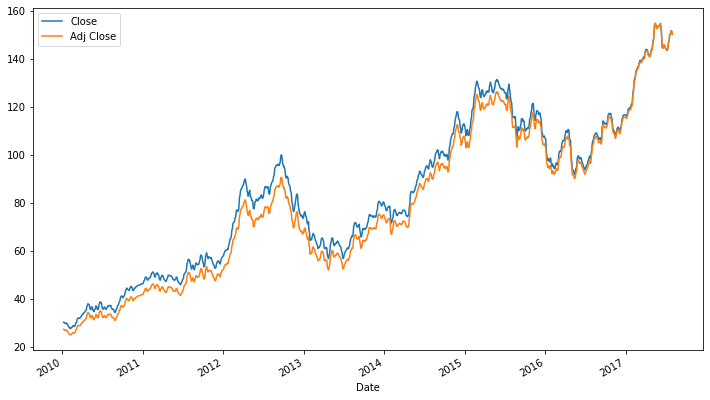

In [163]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

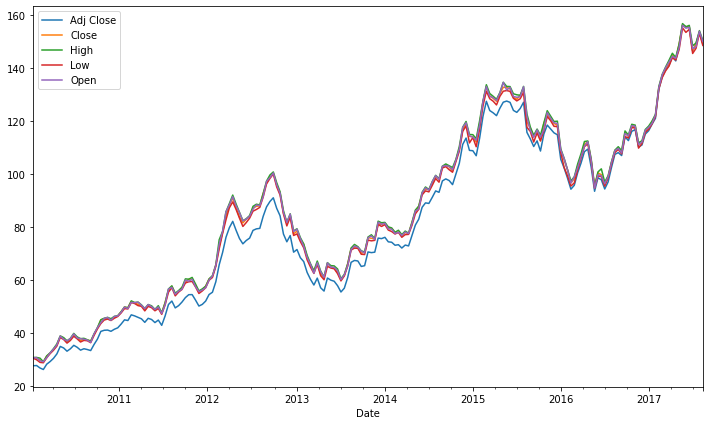

In [164]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

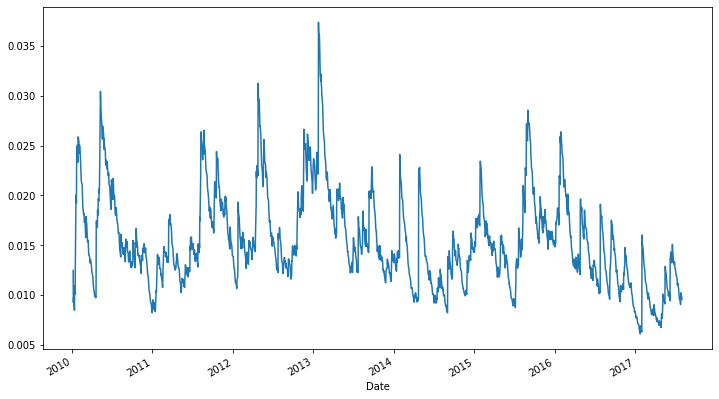

In [165]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [171]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/../demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [172]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

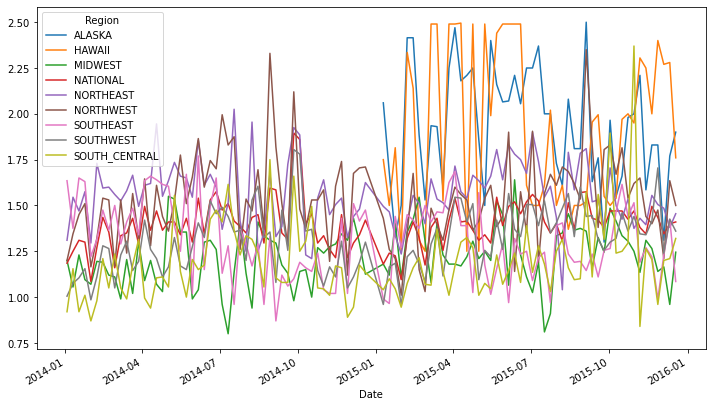

In [173]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [174]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

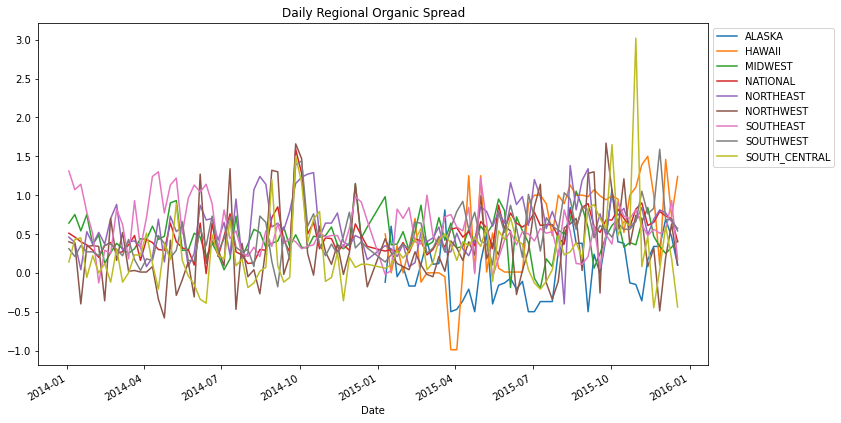

In [175]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [176]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


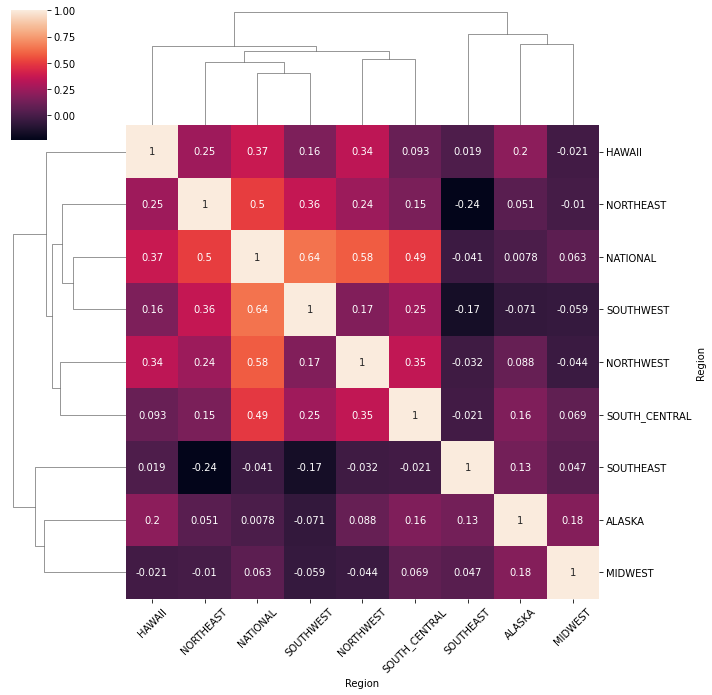

In [177]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My own Example 34 -- Example using GOV.CO data set**

In [180]:
import numpy as np
import pandas as pd


def read_govdata():
   #Download gubernamental data to a dataframe.
   data = pd.read_csv('https://raw.githubusercontent.com/naimuru/AlgorithmsUN2023I/main/Lab2/Auto.csv')
   return data

gov = read_govdata()
gov.head()

,placavehiculo,cilindraje,modelovehiculo,clasedevehiculo,tipodeservicio,numeromotorvehiculo,numerochasis,capacidadpasajeros,numerofacturadeventa,tipodecombustible,estado
0,932ACL,197.0,2015,MOTOCARRO,PARTICULAR,ZS163QML8F100948,9F2A42007F5001116,1,6084.0,GASOLINA,ACTIVO
1,TBB460,6925.0,1983,CAMION,PUBLICO,FE6108174E,CM203620,2,202618.0,ACPM,ACTIVO
2,BCG793,1300.0,1993,AUTOMOVIL,PARTICULAR,E3326817,323HB21654,5,7031.0,GASOLINA,ACTIVO
3,HMG032,1297.0,1989,AUTOMOVIL,PARTICULAR,E3-256387,323HE-02088,5,56422.0,GASOLINA,ACTIVO
4,FSC321,4230.0,1980,CAMPERO,PARTICULAR,2F410842,FJ4365298,8,7114.0,GASOLINA,ACTIVO


In [181]:
gov.tail()

,placavehiculo,cilindraje,modelovehiculo,clasedevehiculo,tipodeservicio,numeromotorvehiculo,numerochasis,capacidadpasajeros,numerofacturadeventa,tipodecombustible,estado
10969,TJY121,10800.0,2013,VOLQUETA,PUBLICO,35305884,714399,2,6295.0,ACPM,ACTIVO
10970,BEP361,9999.0,1995,TRACTOCAMION,PUBLICO,9LN01523,N/N,2,130337.0,ACPM,ACTIVO
10971,ABO046,1000.0,2007,AUTOMOVIL,PARTICULAR,B10S1630874KA2,KL1MM61077C233266,5,1777.0,GASOLINA,ROBADO
10972,WIJ25A,134.0,2010,MOTOCICLETA,PARTICULAR,JNGBSA20783,MD2JNB2Z7AVA01578,1,10339.0,GASOLINA,ACTIVO
10973,TJY006,14945.0,2013,TRACTOCAMION,PUBLICO,79541592,3HSCNAPT4DN051817,2,15956.0,ACPM,ACTIVO


In [182]:
gov.dtypes

placavehiculo            object
cilindraje              float64
modelovehiculo            int64
clasedevehiculo          object
tipodeservicio           object
numeromotorvehiculo      object
numerochasis             object
capacidadpasajeros        int64
numerofacturadeventa    float64
tipodecombustible        object
estado                   object
dtype: object

Here we show a plot where we can see the mean for vehicles that are under the type of service "PARTICULAR"


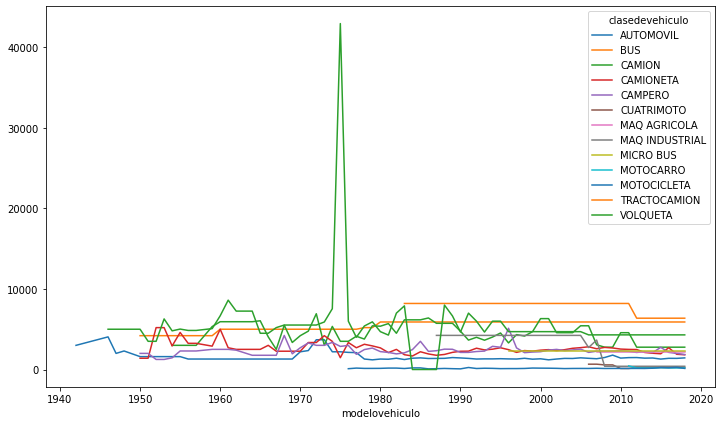

In [188]:
vehicle = gov[gov.tipodeservicio == 'PARTICULAR']
vehicle.groupby(['modelovehiculo', 'clasedevehiculo'])['cilindraje'].mean().unstack().ffill().plot();

Quite the same as the previous example, but for "PUBLICO"

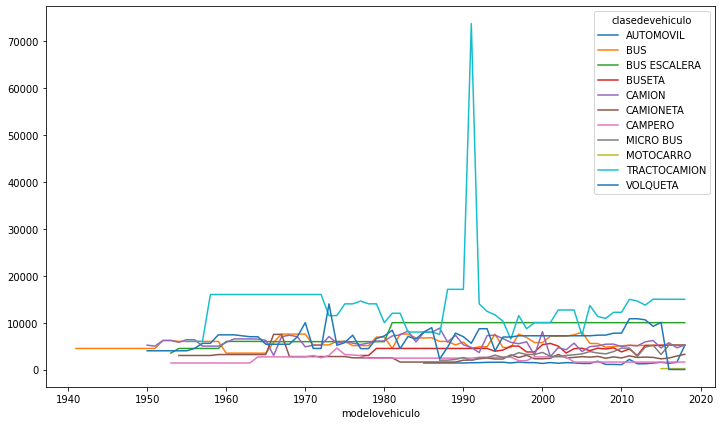

In [189]:
vehicle = gov[gov.tipodeservicio == 'PUBLICO']
vehicle.groupby(['modelovehiculo', 'clasedevehiculo'])['cilindraje'].mean().unstack().ffill().plot();

Now, if we change the conditions a little bit, lets say instead of '**cilindraje**' lets put the passengers capacity for both of them (Private and Public)

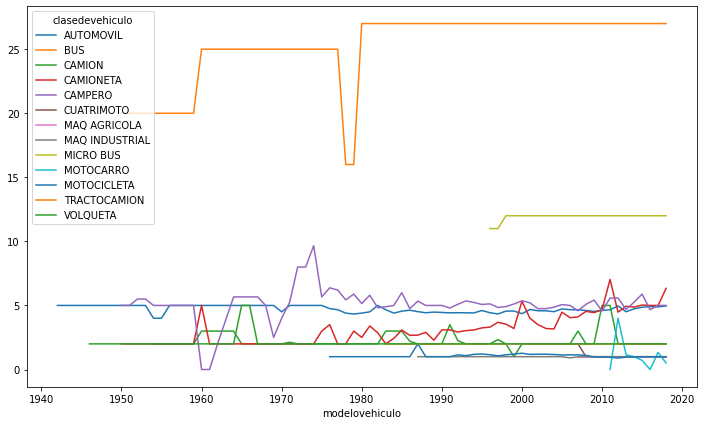

In [190]:
vehicle = gov[gov.tipodeservicio == 'PARTICULAR']
vehicle.groupby(['modelovehiculo', 'clasedevehiculo'])['capacidadpasajeros'].mean().unstack().ffill().plot();

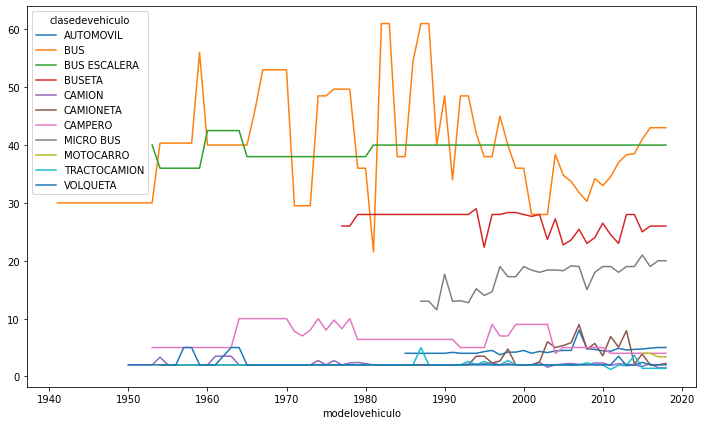

In [192]:
vehicle = gov[gov.tipodeservicio == 'PUBLICO']
vehicle.groupby(['modelovehiculo', 'clasedevehiculo'])['capacidadpasajeros'].mean().unstack().ffill().plot();

In [222]:
def spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('modelovehiculo').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def spread_by_region(df):
    """
    """
    return (
        df
        .set_index(['modelovehiculo', 'clasedevehiculo', 'modelovehiculo'])
         ['capacidadpasajeros']
        .unstack(level=['clasedevehiculo', 'cilindraje'])
        .ffill()
        .groupby(level='clasedevehiculo', axis=1)
        .apply(spread)
    )

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!